# Draw polar plots for all categories

In [7]:
# See this for the list of valid ones https://pastebin.com/NGzvE0Ky
interesting_categories = [
  ('VISp', [175, 185, 205], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Slc17a7-IRES2-Cre']),
   ('VISp', [275, 335, 350], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Scnn1a-Tg3-Cre']),
   ('VISp', [375, 390, 400], ['Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Fezf2-CreER', 'Rbp4-Cre_KL100', 'Tlx3-Cre_PL56']),
   ('VISp', [550], ['Ntsr1-Cre_GN220']),
   ('VISp', [175, 185, 195, 200, 225, 275], ['Pvalb-IRES-Cre']),
   ('VISp', [175, 275], ['Vip-IRES-Cre']),
   ('VISp', [265, 285, 350], ['Sst-IRES-Cre']),
   ('VISal', [175, 265], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']), 
   ('VISal', [275], ['Sst-IRES-Cre']),
   ('VISal', [275, 276, 300, 350], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']),
   ('VISal', [365, 375], ['Emx1-IRES-Cre', 'Rbp4-Cre_KL100']),
   ('VISam', [175], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']),
   ('VISam', [275, 320, 325, 350], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']),
   ('VISam', [375], ['Emx1-IRES-Cre', 'Rbp4-Cre_KL100']),
   ('VISl', [175], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']),
   ('VISl', [275, 325, 350], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']),
   ('VISl', [375, 400], ['Fezf2-CreER', 'Rbp4-Cre_KL100', 'Tlx3-Cre_PL56 ', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']),
   ('VISl', [550, 570, 625], ['Ntsr1-Cre_GN220']),
   ('VISl', [175, 250, 275], ['Vip-IRES-Cre']),
   ('VISl', [250, 275], ['Sst-IRES-Cre']),
   ('VISl', [375], ['Sst-IRES-Cre']),
   ('VISpm', [175], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']),
   ('VISpm', [275, 300, 325, 335, 350], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']),
   ('VISpm', [550], ['Ntsr1-Cre_GN220']),
   ('VISpm', [175, 275], ['Vip-IRES-Cre']),
   ('VISpm', [275, 300, 325, 350, 375], ['Sst-IRES-Cre']),
   ('VISrl', [175], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']),
   ('VISrl', [275, 350], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']),
   ('VISrl', [375], ['Rbp4-Cre_KL100 ', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']),
   ('VISrl', [375], ['Sst-IRES-Cre'])
]
     
g_osi_sg_threshold = 0.8

In [8]:
import os
drive_path = '/media/stephen/Brain20191/allen-brain-observatory/visual-coding-2p/'
if not os.path.isdir(drive_path):
    drive_path = '/media/alihamodi/Brain2019/allen-brain-observatory/visual-coding-2p/'
    
import warnings; warnings.simplefilter('ignore');
from utils.polarplot import *
from utils.polardata import *
from utils.data_wrappers import *
import os
import pandas as pd
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.stimulus_info as stim_info
from utils.data_wrappers import *
manifest_file = os.path.join(drive_path,'manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)

In [9]:
get_one_category_polar_data_cache = {}

In [10]:
def get_avg_cell_polar_in_experiment(boc, ec_id, exp_id, cells):
    """
    Get the polar data for all cells in this experiment, then average them out to get a single polar data.
    """
    in_category_cells = cells[cells.experiment_container_id == ec_id]
    sg_response_filter = get_sg_response_filter_from_saskia()
    filtered_cells = get_filtered_cells(in_category_cells, sg_response_filter)
    filtered_cells = filtered_cells[filtered_cells.g_osi_sg > g_osi_sg_threshold]
    print ("In this experiment, we have", len(in_category_cells),
           "cells, but after filtering, we have", len(filtered_cells), "cells")
    
    thetas = []
    rs = []
    cell_ids = []
    data_set = boc.get_ophys_experiment_data(exp_id)
    for ii, row in filtered_cells.iterrows():
        cell_specimen_id = row.cell_specimen_id
        one_cell_polar_data_dict = get_avg_normalized_response_static(
            data_set = data_set,
            cell_specimen_id = cell_specimen_id)
        if one_cell_polar_data_dict is None:
            continue
        theta, r = convert_polar_dict_to_arrays(one_cell_polar_data_dict)
        thetas.append(theta)
        rs.append(r)
        cell_ids.append(cell_specimen_id)
        
    print ("In this experiment, we have", len(in_category_cells),
           "cells, but after filtering and removing negative mean dffs, we have", len(thetas), "cells")
    if len(thetas) == 0:
        return None, None, None
    agg_theta, agg_r = get_avg_polar(thetas, rs)
    return agg_theta, agg_r, len(thetas)

In [11]:
def get_one_category_polar_data(boc, targeted_structure, imaging_depths, cre_lines):
    cache_key = (targeted_structure, tuple(imaging_depths), tuple(cre_lines))
    if cache_key in get_one_category_polar_data_cache:
        return get_one_category_polar_data_cache[cache_key]
    
    exps = boc.get_ophys_experiments(stimuli=[stim_info.STATIC_GRATINGS],
        targeted_structures = [targeted_structure],
        imaging_depths = imaging_depths,
        cre_lines = cre_lines)
    if len(exps) == 0:
        return None, None, None, None
    print ("There are", len(exps), "experiments for ", targeted_structure, imaging_depths, cre_lines)
    thetas = []
    rs = []
    total_num_cells = 0
    for exp in exps:
        e_id = exp['id']
        ec_id = exp['experiment_container_id']
        print("Processing experiment", e_id)
        theta, r, num_cells = get_avg_cell_polar_in_experiment(boc, ec_id, e_id, cells)
        if theta is None or len(theta) == 0:
            continue
        thetas.append(theta)
        rs.append(r)
        total_num_cells += num_cells
        
    agg_theta, agg_r = get_avg_polar(thetas, rs)
    
    if len(thetas) == 0:
        agg_theta, agg_r, thetas, rs, total_num_cells= None, None, None, None, None
    
    get_one_category_polar_data_cache[cache_key] = (agg_theta, agg_r, thetas, rs, total_num_cells)
    return get_one_category_polar_data_cache[cache_key]


There are 20 experiments for  VISp [175, 185, 205] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Slc17a7-IRES2-Cre']
Processing experiment 501794235
In this experiment, we have 305 cells, but after filtering, we have 45 cells
In this experiment, we have 305 cells, but after filtering and removing negative mean dffs, we have 45 cells
Processing experiment 500964514
In this experiment, we have 295 cells, but after filtering, we have 44 cells
In this experiment, we have 295 cells, but after filtering and removing negative mean dffs, we have 44 cells
VISp [175, 185, 205] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Slc17a7-IRES2-Cre'] #Experiments:  2 #Cells: 89


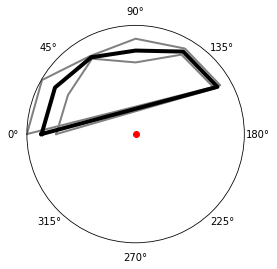

There are 34 experiments for  VISp [275, 335, 350] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Scnn1a-Tg3-Cre']
Processing experiment 658854887
In this experiment, we have 280 cells, but after filtering, we have 38 cells
In this experiment, we have 280 cells, but after filtering and removing negative mean dffs, we have 38 cells
Processing experiment 512124564
In this experiment, we have 122 cells, but after filtering, we have 26 cells
In this experiment, we have 122 cells, but after filtering and removing negative mean dffs, we have 26 cells
VISp [275, 335, 350] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Scnn1a-Tg3-Cre'] #Experiments:  2 #Cells: 64


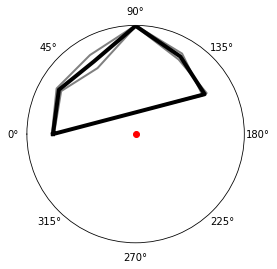

There are 26 experiments for  VISp [375, 390, 400] ['Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Fezf2-CreER', 'Rbp4-Cre_KL100', 'Tlx3-Cre_PL56']
Processing experiment 652340572
In this experiment, we have 83 cells, but after filtering, we have 7 cells
In this experiment, we have 83 cells, but after filtering and removing negative mean dffs, we have 7 cells
Processing experiment 675067662
In this experiment, we have 109 cells, but after filtering, we have 24 cells
In this experiment, we have 109 cells, but after filtering and removing negative mean dffs, we have 24 cells
VISp [375, 390, 400] ['Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Fezf2-CreER', 'Rbp4-Cre_KL100', 'Tlx3-Cre_PL56'] #Experiments:  2 #Cells: 31


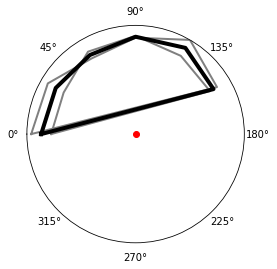

There are 6 experiments for  VISp [550] ['Ntsr1-Cre_GN220']
Processing experiment 603889825
In this experiment, we have 163 cells, but after filtering, we have 9 cells
In this experiment, we have 163 cells, but after filtering and removing negative mean dffs, we have 9 cells
Processing experiment 645035917
In this experiment, we have 69 cells, but after filtering, we have 8 cells
In this experiment, we have 69 cells, but after filtering and removing negative mean dffs, we have 8 cells
VISp [550] ['Ntsr1-Cre_GN220'] #Experiments:  2 #Cells: 17


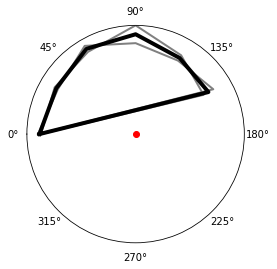

There are 13 experiments for  VISp [175, 185, 195, 200, 225, 275] ['Pvalb-IRES-Cre']
Processing experiment 670399058
In this experiment, we have 22 cells, but after filtering, we have 0 cells
In this experiment, we have 22 cells, but after filtering and removing negative mean dffs, we have 0 cells
Processing experiment 668528146
In this experiment, we have 49 cells, but after filtering, we have 0 cells
In this experiment, we have 49 cells, but after filtering and removing negative mean dffs, we have 0 cells
There are 17 experiments for  VISp [175, 275] ['Vip-IRES-Cre']
Processing experiment 605913519
In this experiment, we have 17 cells, but after filtering, we have 0 cells
In this experiment, we have 17 cells, but after filtering and removing negative mean dffs, we have 0 cells
Processing experiment 583631286
In this experiment, we have 14 cells, but after filtering, we have 0 cells
In this experiment, we have 14 cells, but after filtering and removing negative mean dffs, we have 0 ce

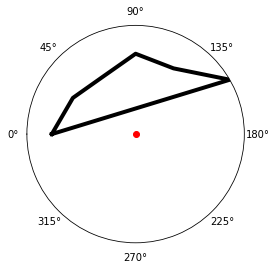

There are 10 experiments for  VISal [175, 265] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']
Processing experiment 562172003
In this experiment, we have 209 cells, but after filtering, we have 18 cells
In this experiment, we have 209 cells, but after filtering and removing negative mean dffs, we have 18 cells
Processing experiment 604576637
In this experiment, we have 64 cells, but after filtering, we have 5 cells
In this experiment, we have 64 cells, but after filtering and removing negative mean dffs, we have 5 cells
VISal [175, 265] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre'] #Experiments:  2 #Cells: 23


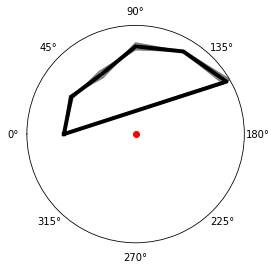

There are 1 experiments for  VISal [275] ['Sst-IRES-Cre']


IndexError: list index out of range

In [12]:
import warnings; warnings.simplefilter('ignore');
for targeted_structure, imaging_depths, cre_lines in interesting_categories:
    agg_theta, agg_r, thetas, rs, num_cells = get_one_category_polar_data(
        boc,
        targeted_structure,
        imaging_depths,
        cre_lines)
    if agg_theta is None:
        continue
    print(targeted_structure, imaging_depths, cre_lines, "#Experiments: ", len(thetas), "#Cells:", num_cells)

    max_r = max(np.array(agg_r).max(), np.array(rs).max())

    agg_r_np = np.array(agg_r)
    agg_r_np = agg_r_np / max_r
    rs_np = np.array(rs)
    rs_np = rs_np / max_r
    fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
    polar_plot_population(ax=ax,
        bold_theta = agg_theta,
        bold_r = agg_r_np,
        grey_thetas = thetas, 
        grey_rs = rs_np)


    plt.show()